# Libraries

In [36]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

#  Breast Cancer Dataset

In [20]:
df=pd.read_csv(r"D:\Projects\Machine Learning\Breast cancer detection\breast cancer.csv")

In [21]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Data Preprocessing 

In [22]:
df.shape

(569, 33)

In [23]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [24]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [25]:
# Drop non-numeric / unnecessary columns
df = df.drop(columns=["id",'Unnamed: 32'],axis=1)  


In [27]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [28]:
df.duplicated().sum()

np.int64(0)

In [29]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [30]:
df['diagnosis'].nunique()

2

In [31]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [32]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})


 

- Dropped the Unnamed: 32 column because it contanined only null values.
- There is no null values and duplicate records.Checked using .null().sum() and .duplicated().sum()
- Selected the columns that we will be using for the prediction.



# Correlation Heatmap

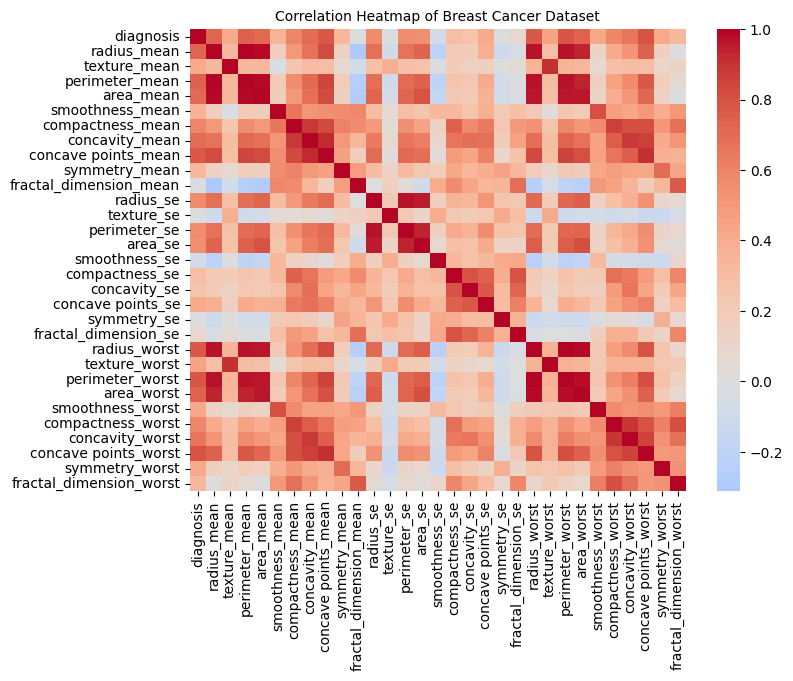

In [33]:
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Breast Cancer Dataset", fontsize=10)
plt.show()

# Feature Selection - Feature Importance from the Random forest

In [34]:
# features and target
X = df.drop(columns=["diagnosis"])  
y = df["diagnosis"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# feature importances
importances = rf.feature_importances_
features = X.columns


feat_importances = pd.DataFrame({"Feature": features, "Importance": importances})
feat_importances = feat_importances.sort_values(by="Importance", ascending=False)

# Select top 10 features
top10_features = feat_importances.head(10)
print("Top 10 Selected Features:\n", top10_features)


Top 10 Selected Features:
                  Feature  Importance
23            area_worst    0.153892
27  concave points_worst    0.144663
7    concave points_mean    0.106210
20          radius_worst    0.077987
6         concavity_mean    0.068001
22       perimeter_worst    0.067115
2         perimeter_mean    0.053270
0            radius_mean    0.048703
3              area_mean    0.047555
26       concavity_worst    0.031802


# Model Training - Random Forest using the Top 10 features selected using the feature importance

In [40]:

top_features = [
    "area_worst",
    "concave points_worst",
    "concave points_mean",
    "radius_worst",
    "concavity_mean",
    "perimeter_worst",
    "perimeter_mean",
    "radius_mean",
    "area_mean",
    "concavity_worst"
]


X = df[top_features]
y = df['diagnosis']  

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Random forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.956140350877193

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



In [41]:
print(confusion_matrix(y_test,y_pred))

[[72  0]
 [ 5 37]]


# Train Test Split

In [55]:
X = df.drop("diagnosis",axis=1)
y= df["diagnosis"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 


# Logistic Regression

In [43]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train
log_reg.fit(X_train, y_train)

# Predict
y_pred = log_reg.predict(X_test)

# Evaluate
print("Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Logistic Regression Results
Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [44]:
print(confusion_matrix(y_test,y_pred))

[[71  1]
 [ 3 39]]


# SVM - Support Vector Machine 

In [54]:
svm_clf = SVC(kernel='rbf', probability=True, random_state=42)

# Train
svm_clf.fit(X_train, y_train)

# Predict
y_pred = svm_clf.predict(X_test)

# Evaluate
print(" SVM Results")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


 SVM Results
Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



In [46]:
print(confusion_matrix(y_test,y_pred))

[[72  0]
 [ 3 39]]


# XGBoost

In [57]:
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Train
xgb_clf.fit(X_train, y_train)

# Predict
y_pred = xgb_clf.predict(X_test)

# Evaluate
print("XGBoost Results")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


XGBoost Results
Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



In [49]:
print(confusion_matrix(y_test,y_pred))

[[72  0]
 [ 3 39]]


# Deployment

In [73]:
import pickle
pickle.dump(rfmodel,open("model.pkl",'wb'))
pickle.dump(scaler, open("scaler.pkl",'wb'))


In [61]:
df = df[[
    "radius_mean",
    "texture_mean",
    "perimeter_mean",
    "area_mean",
    "smoothness_mean",
    "compactness_mean",
    "concavity_mean",
    "concave points_mean",
    "diagnosis"
]]
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,1


In [70]:
X = df.drop('diagnosis',axis=1) 
y = df['diagnosis'] 

X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42) 

scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 
rfmodel = RandomForestClassifier() 
rfmodel.fit(X_train, y_train) 
y_pred = rfmodel.predict(X_test)

In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [72]:
print(confusion_matrix(y_test,y_pred))

[[68  3]
 [ 3 40]]
